In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split


%matplotlib inline

In [2]:
# loading the training dataset
letters = pd.read_csv('train_1.csv')
letters

,1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,...,1.819,1.820,1.821,1.822,1.823,1.824,1.825,1.826,1.827,1.828
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,14
1,1,1,1,1,1,1,1,0,0,0,...,0,1,1,1,1,1,1,1,1,4
2,1,1,1,1,1,1,0,0,0,1,...,1,1,0,0,0,1,1,1,1,12
3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,20
4,1,1,1,1,1,1,1,0,0,0,...,0,1,1,1,1,1,1,1,1,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1191,1,1,1,1,1,1,1,1,1,1,...,0,0,0,1,1,1,1,1,1,6
1192,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,1,1,1,1,1,6
1193,1,1,1,1,1,1,1,1,1,0,...,1,1,1,1,1,1,1,1,1,1
1194,0,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [3]:
# getting the class column
y_train = letters.iloc[:,-1:]
y_train

,1.828
0,14
1,4
2,12
3,20
4,14
...,...
1191,6
1192,6
1193,1
1194,1


In [4]:
x_train = letters.iloc[:,:-1]
x_train

,1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,...,1.818,1.819,1.820,1.821,1.822,1.823,1.824,1.825,1.826,1.827
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,0,0,0,...,0,0,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,0,0,0,1,...,1,1,1,0,0,0,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,0,0,0,...,0,0,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1191,1,1,1,1,1,1,1,1,1,1,...,1,0,0,0,1,1,1,1,1,1
1192,1,1,1,1,1,1,1,1,1,1,...,1,0,0,0,0,1,1,1,1,1
1193,1,1,1,1,1,1,1,1,1,0,...,0,1,1,1,1,1,1,1,1,1
1194,0,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [5]:
test = pd.read_csv('test_with_label_1.csv')

In [6]:
x_test = test.iloc[:,:-1]

In [7]:
y_test = test.iloc[:,-1:]

Best-DT

In [174]:
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [175]:
# Creating a DecisionTreeClassifier
    
dec_tree = tree.DecisionTreeClassifier()

In [176]:
parameters = {
    "criterion":["gini","entropy"],
    "max_depth": [10,None],
    "min_samples_split":range(4,40,10),
    "min_impurity_decrease":[0.01,0.2,0.3,0.04],
    "class_weight":["balanced",None]
}

In [177]:
clf_GS = GridSearchCV(dec_tree,parameters)

In [178]:
clf_GS.fit(x_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'class_weight': ['balanced', None],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [10, None],
                         'min_impurity_decrease': [0.01, 0.2, 0.3, 0.04],
                         'min_samples_split': range(4, 40, 10)})

In [179]:
# start printing the best parameters depending on Gridsearch

In [180]:
print('Best Criterion:', clf_GS.best_estimator_.get_params()['criterion'])

Best Criterion: entropy


In [181]:
print('Best max_depth:', clf_GS.best_estimator_.get_params()['max_depth'])

Best max_depth: None


In [182]:
print('Best max_depth:', clf_GS.best_estimator_.get_params()['min_samples_split'])

Best max_depth: 4


In [183]:
print('Best max_depth:', clf_GS.best_estimator_.get_params()['min_impurity_decrease'])

Best max_depth: 0.01


In [184]:
print('Best max_depth:', clf_GS.best_estimator_.get_params()['class_weight'])

Best max_depth: None


In [168]:
# printing the tree
print(clf_GS.best_estimator_.get_params()[dec_tree])

KeyError: DecisionTreeClassifier()

Testing prediction using the grid

In [215]:
results = clf_GS.predict(x_test)

Testing using the results from grid but with the DT classifier

In [190]:
dec_tree = DecisionTreeClassifier(criterion="entropy", max_depth = 10,min_samples_split = 4, min_impurity_decrease = 0.01, class_weight = None)

In [191]:
dec_tree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10,
                       min_impurity_decrease=0.01, min_samples_split=4)

In [192]:
results = dec_tree.predict(x_test)

In [193]:
results

array([13, 22,  2, 18, 17, 11, 13, 13, 20,  0,  9, 11, 14,  4,  5,  6,  3,
        2,  7,  9,  0,  9, 17,  9,  1, 22, 20, 23, 22, 25, 23,  0, 14, 22,
       24,  6, 19,  9, 17, 16, 22, 13, 15,  7,  7, 13, 16, 24,  0,  7,  3,
       22, 20, 15,  6, 23,  9,  5, 14, 22,  2, 11, 10,  0,  0,  2, 20, 24,
       21, 24, 23, 21,  8, 22, 18, 15,  5,  2, 19], dtype=int64)

In [194]:
clf_GS.score(x_test,y_test)

0.4936708860759494

In [195]:
print(classification_report(y_test,results))

              precision    recall  f1-score   support

           0       0.50      0.75      0.60         4
           1       1.00      0.50      0.67         2
           2       0.60      0.75      0.67         4
           3       0.50      0.33      0.40         3
           4       1.00      1.00      1.00         1
           5       0.33      0.50      0.40         2
           6       0.33      0.25      0.29         4
           7       0.25      0.33      0.29         3
           8       1.00      0.33      0.50         3
           9       0.50      0.75      0.60         4
          10       0.00      0.00      0.00         3
          11       1.00      0.75      0.86         4
          12       0.00      0.00      0.00         3
          13       0.40      0.50      0.44         4
          14       0.33      0.33      0.33         3
          15       0.33      0.33      0.33         3
          16       0.50      0.33      0.40         3
          17       0.67    

c:\users\makdissi\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [41]:
clf_GS.best_estimator_

DecisionTreeClassifier(criterion='entropy')

In [42]:
clf_GS.best_score_

0.4682357043235704

In [30]:
clf_GS.best_params_

{'criterion': 'entropy', 'max_depth': None}

AttributeError: 'GridSearchCV' object has no attribute 'tree_'

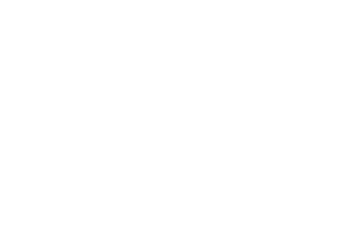

In [21]:
tree.plot_tree(clf_GS)